In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('billionaires.csv')
df.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [14]:
df_reformed = df.sort_values('year', ascending=False).drop_duplicates('name').sort_index()
df_reformed.head()

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,NaN,pharmaceuticals,new,0,NaN,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
11,Warren Buffett,4,2014,1839,Berkshire Hathaway,founder,Finance,aquired,83,male,...,0.000000e+00,North America,founder non-finance,58.2,Traded Sectors,True,Consumer,not inherited,True,True


In [88]:
def return_top_x_categories(input_df, col_name, x):
    df_ = input_df.groupby(col_name)['name'].count()
    df_ = df_.sort_values(ascending=False)
#     df_sector['Others'] = df_sector[x:].sum()
    return df_.iloc[0:x]


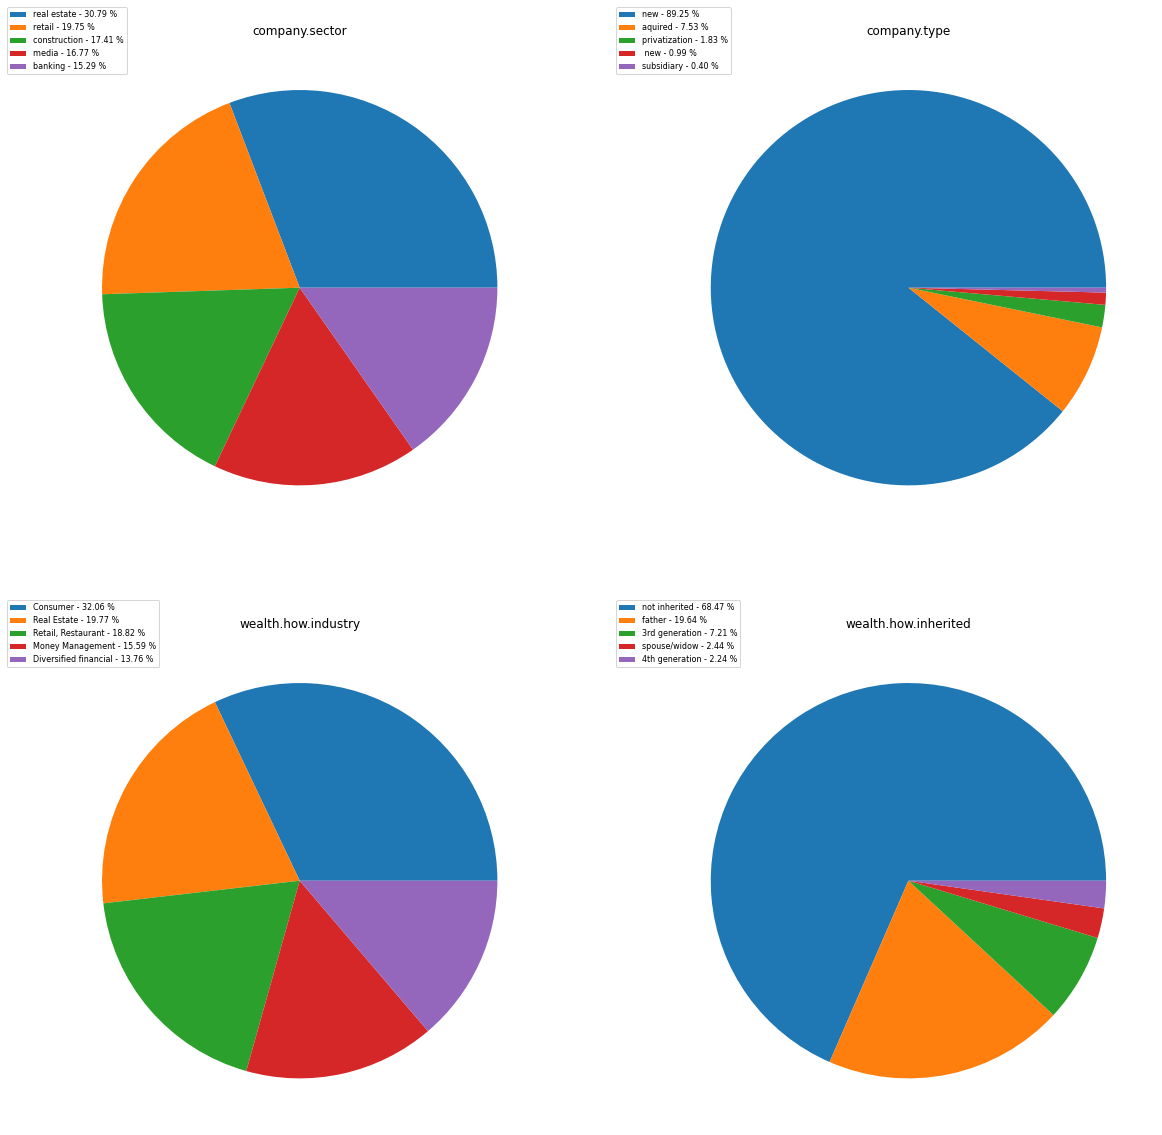

In [143]:
list_cols = ['company.sector', 'company.type', 'wealth.how.industry', 'wealth.how.inherited']
figure, axis = plt.subplots(2, 2, figsize=(20, 20))
indices = [(i, j) for i in range(2) for j in range(2)]
top_ = 5


for x, col in enumerate(list_cols):
    this_axis = axis[indices[x][0]][indices[x][1]]
    df_this = return_top_x_categories(df_reformed, col, top_)
    
    percents = 100 * df_this / df_this.sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df_this.index, percents)]

    patches, texts = this_axis.pie(df_this.values, radius=1)
    this_axis.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.1, 1.), fontsize=8)
    this_axis.title.set_text(col)

plt.savefig('research.png', dpi=300)
plt.show()